In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gym

     |████████████████████████████████| 1.6 MB 594 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 1.6 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.17.2-py3-none-any.whl size=1650891 sha256=3db4df9cc07643a149fca665726775bc15756821e9a83059768df888a9d30151
  Stored in directory: /Users/bravo/Library/Caches/pip/wheels/48/bf/7c/44b1b8e4ad998fc48e31caedbb9e028351861b8d20632642bc
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=4f054e1bf9a61d5a5bd449be1878898fb3dcb6bbbdc7e7352ea477e6f3620f40
  Stored in directory: /Users/bravo/Library/Caches/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built gym future
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

     |████████████████████████████████| 175.4 MB 48 kB/s  eta 0:00:01     |███████████████████████▏        | 127.1 MB 798 kB/s eta 0:01:01     |██████████████████████████████▋ | 167.9 MB 3.8 MB/s eta 0:00:02
     |████████████████████████████████| 3.0 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 945 kB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.1 MB/s eta 0:00:011
     |████████████████████████████████| 454 kB 826 kB/s eta 0:00:01
  Using cached scipy-1.4.1-cp38-cp38-macosx_10_9_x86_64.whl (28.8 MB)
     |████████████████████████████████| 3.0 MB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 88 k

In [15]:
import numpy as np
import pandas as pd
import inspect
import random
import gym
import sys
import tensorflow as tf
import tensorflow.keras.layers as kl
import tensorflow.keras.losses as kls
import tensorflow.keras.optimizers as ko
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from collections import deque
import os

In [18]:
!{sys.executable} -m pip install 'kaggle-environments>=0.1.6'

  Using cached kaggle_environments-1.0.11-py2.py3-none-any.whl (90 kB)


In [19]:
from kaggle_environments import evaluate, make, utils
env = make("connectx", debug=True)
env.render()

In [20]:
env.agents

{'random': <function kaggle_environments.envs.connectx.connectx.random_agent(obs, config)>,
 'negamax': <function kaggle_environments.envs.connectx.connectx.negamax_agent(obs, config)>}

In [21]:
env.configuration

{'episodeSteps': 1000,
 'agentExec': 'LOCAL',
 'agentTimeout': 16,
 'actTimeout': 8,
 'runTimeout': 1200,
 'columns': 7,
 'rows': 6,
 'inarow': 4,
 'timeout': 8}

In [22]:
env.specification

{'name': 'connectx',
 'title': 'ConnectX',
 'description': 'Classic Connect in a row but configurable.',
 'version': '1.0.1',
 'agents': [2],
 'configuration': {'episodeSteps': {'description': 'Maximum number of steps in the episode.',
   'type': 'integer',
   'minimum': 1,
   'default': 1000},
  'agentExec': {'description': 'How the agent is executed alongside the running envionment.',
   'type': 'string',
   'default': 'LOCAL',
   'enum': ['LOCAL', 'PROCESS']},
  'agentTimeout': {'description': 'Maximum runtime (seconds) to initialize an agent.',
   'type': 'integer',
   'minimum': 1,
   'default': 16},
  'actTimeout': {'description': 'Maximum runtime (seconds) to obtain an action from an agent.',
   'type': 'integer',
   'minimum': 1,
   'default': 8},
  'runTimeout': {'description': 'Maximum runtime (seconds) of an episode (not necessarily DONE).',
   'type': 'integer',
   'minimum': 1,
   'default': 1200},
  'columns': {'description': 'The number of columns on the board',
   'type

## Create an agent

In [23]:
def my_agent(observation, configuration):
    from random import choice
    return choice([c for c in range(configuration.columns) if observation.board[c] == 0])

In [24]:
trainer = env.train([None, "random"])
observation = trainer.reset()

print("Observation contains:\t", observation)
print("Configuration contains:\t", env.configuration)

Observation contains:	 {'board': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'mark': 1}
Configuration contains:	 {'episodeSteps': 1000, 'agentExec': 'LOCAL', 'agentTimeout': 16, 'actTimeout': 8, 'runTimeout': 1200, 'columns': 7, 'rows': 6, 'inarow': 4, 'timeout': 8}


In [25]:
my_action = my_agent(observation, env.configuration)
print("My Action", my_action)
observation, reward, done, info = trainer.step(my_action)
env.render(mode="ipython", width=100, height=90, header=False, controls=False)
print("Observation after:\t", observation)

My Action 3


Observation after:	 {'board': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2], 'mark': 1}


## Train your agent

In [45]:
trainer = env.train([None, "random"])
observation = trainer.reset()
while not env.done:
    my_action = my_agent(observation, env.configuration)
    print("My Action", my_action)
    observation, reward, done, info = trainer.step(my_action)
    print(reward)
env.render(mode="ipython", width=100, height=90, header=False, controls=False)
env.render()

My Action 1
0
My Action 1
0
My Action 5
0
My Action 3
0
My Action 6
0
My Action 4
0
My Action 0
0
My Action 1
0
My Action 1
0
My Action 3
0
My Action 2
0
My Action 6
0
My Action 4
1


In [47]:
class ConnectX(gym.Env):
    def __init__(self):
        self.env = make("connectx", debug=True)
        self.pair = [None,"negamax"]
        self.config = self.env.configuration
        self.trainer = self.env.train(self.pair)
        
        config = self.env.configuration
        self.action_space = gym.spaces.Discrete(config.columns)
        self.observation_space = gym.spaces.Discrete(config.columns * config.rows)
        
    def step(self,action):
        return self.trainer.step(action)
    def reset(self):
        return self.trainer.reset()
    def render(self, **kwargs):
        return self.env.render(**kwargs)

In [48]:
class ProbabilityDistribution(tf.keras.Model):
    def call(self, logits,  **kwargs):
        return tf.squeeze(tf.random.categorical(logits, 1), axis=-1)

In [49]:
class Model(tf.keras.Model):
    def __init__(self, env, num_actions):
        super(Model, self).__init__('mlp_policy')
        self.env = env
        self.num_actions = num_actions
        self.hidden1 = kl.Dense(128, activation='relu')
        self.hidden2 = kl.Dense(128, activation='relu')
        self.value = kl.Dense(1, name='value')
        self.logits = kl.Dense(num_actions,  name='policy_logits')
        self.dist = ProbabilityDistribution()
        self.action_ = None
        self.value_ = None
        self.space = None
        self.empty = []
        
    def call(self, inputs, **kwargs):
        x = tf.convert_to_tensor(inputs)
        hidden_logs = self.hidden1(x)
        hidden_vals = self.hidden2(x)
        return self.logits(hidden_logs), self.value(hidden_vals)
    
    def action_value(self, obs):
        logits, values = self.predict_on_batch(obs)
        action = self.dist.predict_on_batch(logits)
        return np.squeeze(action, axis = -1), np.squeeze(values, axis=-1)
    
    def preprocess(self, state):
        result = state.board[:]
        result.append(state.mark)

        return result

In [50]:
env = ConnectX()
model = Model(env, num_actions=env.action_space.n)
obs = env.reset()
obs = np.array(model.preprocess(obs))
action, value = model.action_value(obs[None, :])
print("Action: " +str(action)+", Value: " + str(value))

Action: 3, Value: [0.08231998]


In [51]:
K.clear_session()
class Agent_Advanced:
    def __init__(self, model, lr=7e-3, gamma=0.8, value_c=0.5, entropy_c=1e-4):
        self.value_c = value_c
        self.entropy_c = entropy_c
        self.gamma = gamma
        self.model = model
        self.model.compile(
                          optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr),
                          loss=[self._logits_loss, self._value_loss]
        )
    def train(self, env, batch_sz=64, updates=500):
        
        ep_rewards = [0.0]
        next_obs = env.reset()
        next_obs = np.array(model.preprocess(next_obs))
        actions = np.empty((batch_sz,), dtype=np.int32)
        rewards, dones, values = np.zeros((3, batch_sz,))
        
        observations = np.empty((batch_sz,len(next_obs.copy())) + env.observation_space.shape)
        for update in range(updates):
            for step in range(batch_sz):
                observations[step] = next_obs.copy()
                actions[step], values[step] = self.model.action_value(next_obs[None, :])
                next_obs, rewards[step], dones[step], _ = env.step(int(actions[step]))
                                
                if rewards[step] >= 0.5: # Won
                    rewards[step] = 20
                elif rewards[step] == 0.0: # Lost
                    rewards[step] = -20
                else: # Draw
                    rewards[step] = 0.05
                ep_rewards[-1] += rewards[step]    
                
                next_obs = np.array(model.preprocess(next_obs))    
                if dones[step]:
                    ep_rewards.append(0.0)
                    next_obs = env.reset()
                    next_obs = np.array(model.preprocess(next_obs))
                    print("Episode: %03d, Reward: %03d" % (len(ep_rewards) - 1, ep_rewards[-2]))
                    
                    
                
            _, next_value = self.model.action_value(next_obs[None, :])
            returns, advs = self._returns_advantages(rewards, dones, values, next_value)
            acts_and_advs = np.concatenate([actions[:, None], advs[:, None]], axis=-1)
            losses = self.model.fit(observations, [acts_and_advs, returns])
            
            print("[%d/%d] Losses: %s" % (update + 1, updates, losses.history['loss']))

        return ep_rewards
    
    def _returns_advantages(self, rewards, done, values, next_value):
        returns = np.append(np.zeros_like(rewards), next_value, axis=-1)
        
        for t in reversed(range(rewards.shape[0])):
            returns[t] = rewards[t] + self.gamma * returns[t+1] * (1 - done[t])
        returns = returns[:-1]
        advantages = returns - values
        
        return returns, advantages
        
    def _value_loss(self, return_, value):
        return self.value_c * kls.mean_squared_error(return_, value)
    
    def _logits_loss(self, actions_and_advantages, logits):
        actions, advantages = tf.split(actions_and_advantages, 2, axis=-1)
        weighted_sparse_ce = kls.SparseCategoricalCrossentropy(from_logits=True)
        policy_loss = weighted_sparse_ce(actions, logits, sample_weight=advantages)
        
        probs = tf.nn.softmax(logits)
        entropy_loss = kls.categorical_crossentropy(probs, probs)
        return policy_loss - self.entropy_c * entropy_loss

In [52]:
env = ConnectX()
model = Model(env, num_actions=env.action_space.n)
model.run_eagerly = True
print("Eager Execution:  ", tf.executing_eagerly())
print("Eager Keras Model:", model.run_eagerly)

Eager Execution:   True
Eager Keras Model: True


In [54]:
agent = Agent_Advanced(model)
rewards_history = agent.train(env)
print("Finished training, testing....")

Episode: 001, Reward: -99
Episode: 002, Reward: -59
Episode: 003, Reward: -59
Invalid Action: Invalid column: 0
Episode: 004, Reward: -119
Invalid Action: Invalid column: 0
Episode: 005, Reward: -119
Episode: 006, Reward: -79
Episode: 007, Reward: -59
Invalid Action: Invalid column: 0
Episode: 008, Reward: -219
Invalid Action: Invalid column: 0
Episode: 009, Reward: -159
Episode: 010, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 742.0582 - output_1_loss: -43.2024 - output_2_loss: 785.2606
[1/500] Losses: [742.0582275390625]
Episode: 011, Reward: -99
Episode: 012, Reward: -159
Invalid Action: Invalid column: 1
Episode: 013, Reward: -139
Invalid Action: Invalid column: 1
Episode: 014, Reward: -119
Episode: 015, Reward: -99
Episode: 016, Reward: -99
Invalid Action: Invalid column: 1
Episode: 017, Reward: -139
Invalid Action: Invalid column: 1
Episode: 018, Reward: -139
Episode: 019, Reward: -139
2/2 [==============================] - 0s 1ms/step - loss: 734.7667 

Episode: 146, Reward: -79
Invalid Action: Invalid column: 1
Episode: 147, Reward: -99
Episode: 148, Reward: -79
Episode: 149, Reward: -79
Invalid Action: Invalid column: 1
Episode: 150, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 205.1837 - output_1_loss: -3.9968 - output_2_loss: 209.1805
[14/500] Losses: [205.1837158203125]
Invalid Action: Invalid column: 1
Episode: 151, Reward: -99
Episode: 152, Reward: -79
Invalid Action: Invalid column: 1
Episode: 153, Reward: -99
Episode: 154, Reward: -99
Invalid Action: Invalid column: 1
Episode: 155, Reward: -79
Episode: 156, Reward: -59
Episode: 157, Reward: -79
Invalid Action: Invalid column: 1
Episode: 158, Reward: -99
Invalid Action: Invalid column: 1
Episode: 159, Reward: -99
Invalid Action: Invalid column: 1
Episode: 160, Reward: -99
Episode: 161, Reward: -99
Invalid Action: Invalid column: 1
Episode: 162, Reward: -99
2/2 [==============================] - 0s 3ms/step - loss: 235.7081 - output_1_loss: -9.0027 - o

Episode: 298, Reward: -99
Invalid Action: Invalid column: 1
Episode: 299, Reward: -99
Episode: 300, Reward: -79
Episode: 301, Reward: -79
Episode: 302, Reward: -59
Invalid Action: Invalid column: 1
Episode: 303, Reward: -139
Invalid Action: Invalid column: 1
Episode: 304, Reward: -119
Episode: 305, Reward: -79
Episode: 306, Reward: -59
Episode: 307, Reward: -79
Invalid Action: Invalid column: 1
Episode: 308, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 184.0724 - output_1_loss: 1.8196 - output_2_loss: 182.2528
[28/500] Losses: [184.07244873046875]
Invalid Action: Invalid column: 1
Episode: 309, Reward: -99
Episode: 310, Reward: -99
Episode: 311, Reward: -59
Invalid Action: Invalid column: 0
Episode: 312, Reward: -139
Episode: 313, Reward: -59
Episode: 314, Reward: -99
Episode: 315, Reward: -59
Episode: 316, Reward: -119
Invalid Action: Invalid column: 0
Episode: 317, Reward: -159
Invalid Action: Invalid column: 1
Episode: 318, Reward: -99
Invalid Action: Inval

2/2 [==============================] - 0s 1ms/step - loss: 90.1762 - output_1_loss: -3.6793 - output_2_loss: 93.8555
[57/500] Losses: [90.17623901367188]
Episode: 657, Reward: -79
Invalid Action: Invalid column: 2
Episode: 658, Reward: -139
Episode: 659, Reward: -139
Episode: 660, Reward: -59
Episode: 661, Reward: -59
Episode: 662, Reward: -59
Episode: 663, Reward: -59
Episode: 664, Reward: -59
Episode: 665, Reward: -99
Episode: 666, Reward: -59
Episode: 667, Reward: -59
Episode: 668, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 112.0363 - output_1_loss: -0.1572 - output_2_loss: 112.1935
[58/500] Losses: [112.03630065917969]
Episode: 669, Reward: -99
Episode: 670, Reward: -79
Episode: 671, Reward: -79
Episode: 672, Reward: -99
Episode: 673, Reward: -59
Episode: 674, Reward: -59
Episode: 675, Reward: -59
Episode: 676, Reward: -59
Episode: 677, Reward: -99
Episode: 678, Reward: -59
Episode: 679, Reward: -59
Episode: 680, Reward: -59
Invalid Action: Invalid colum

Episode: 1020, Reward: -59
Episode: 1021, Reward: -59
Episode: 1022, Reward: -119
Episode: 1023, Reward: -59
Episode: 1024, Reward: -79
Episode: 1025, Reward: -59
Invalid Action: Invalid column: 2
Episode: 1026, Reward: -119
Episode: 1027, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 97.0602 - output_1_loss: -0.4760 - output_2_loss: 97.5362
[87/500] Losses: [97.06019592285156]
Episode: 1028, Reward: -59
Invalid Action: Invalid column: 1
Episode: 1029, Reward: -99
Episode: 1030, Reward: -119
Episode: 1031, Reward: -79
Episode: 1032, Reward: -59
Episode: 1033, Reward: -59
Invalid Action: Invalid column: 1
Episode: 1034, Reward: -99
Episode: 1035, Reward: -59
Invalid Action: Invalid column: 2
Episode: 1036, Reward: -139
Episode: 1037, Reward: -79
Episode: 1038, Reward: -79
Episode: 1039, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 89.0795 - output_1_loss: -0.5836 - output_2_loss: 89.6631
[88/500] Losses: [89.07951354980469]
Episode: 104

Episode: 1386, Reward: -99
Episode: 1387, Reward: -99
Episode: 1388, Reward: -59
Episode: 1389, Reward: -59
Episode: 1390, Reward: -59
Episode: 1391, Reward: -119
Episode: 1392, Reward: -59
Invalid Action: Invalid column: 2
Episode: 1393, Reward: -119
Episode: 1394, Reward: -59
Invalid Action: Invalid column: 1
Episode: 1395, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 61.9660 - output_1_loss: -1.5363 - output_2_loss: 63.5023
[116/500] Losses: [61.96599578857422]
Invalid Action: Invalid column: 2
Episode: 1396, Reward: -119
Episode: 1397, Reward: -59
Episode: 1398, Reward: -59
Episode: 1399, Reward: -59
Invalid Action: Invalid column: 2
Episode: 1400, Reward: -139
Episode: 1401, Reward: -99
Episode: 1402, Reward: -79
Episode: 1403, Reward: -99
Episode: 1404, Reward: -59
Episode: 1405, Reward: -99
Episode: 1406, Reward: -59
Episode: 1407, Reward: -59
Episode: 1408, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 62.9414 - output_1_loss: 

Episode: 1570, Reward: -59
Episode: 1571, Reward: -59
Episode: 1572, Reward: -59
Episode: 1573, Reward: -79
Episode: 1574, Reward: -59
Episode: 1575, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 58.3866 - output_1_loss: 0.6543 - output_2_loss: 57.7323
[130/500] Losses: [58.386619567871094]
Episode: 1576, Reward: -59
Episode: 1577, Reward: -59
Episode: 1578, Reward: -79
Episode: 1579, Reward: -59
Episode: 1580, Reward: -59
Invalid Action: Invalid column: 2
Episode: 1581, Reward: -119
Episode: 1582, Reward: -59
Episode: 1583, Reward: -119
Episode: 1584, Reward: -79
Episode: 1585, Reward: -79
Episode: 1586, Reward: -79
Episode: 1587, Reward: -79
Invalid Action: Invalid column: 2
Episode: 1588, Reward: -119
2/2 [==============================] - 0s 1ms/step - loss: 56.5691 - output_1_loss: 0.0204 - output_2_loss: 56.5487
[131/500] Losses: [56.56910705566406]
Episode: 1589, Reward: -59
Episode: 1590, Reward: -59
Invalid Action: Invalid column: 2
Episode: 1591, Rewa

2/2 [==============================] - 0s 1ms/step - loss: 135.0494 - output_1_loss: -2.5681 - output_2_loss: 137.6175
[144/500] Losses: [135.04942321777344]
Invalid Action: Invalid column: 2
Episode: 1747, Reward: -139
Episode: 1748, Reward: -59
Invalid Action: Invalid column: 2
Episode: 1749, Reward: -119
Episode: 1750, Reward: -59
Episode: 1751, Reward: -79
Episode: 1752, Reward: -99
Episode: 1753, Reward: -59
Episode: 1754, Reward: -59
Episode: 1755, Reward: -59
Episode: 1756, Reward: -59
Episode: 1757, Reward: -79
Episode: 1758, Reward: -59
Episode: 1759, Reward: -59
Episode: 1760, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 63.2260 - output_1_loss: 2.2913 - output_2_loss: 60.9347
[145/500] Losses: [63.22601318359375]
Episode: 1761, Reward: -59
Episode: 1762, Reward: -79
Episode: 1763, Reward: -59
Episode: 1764, Reward: -59
Episode: 1765, Reward: -79
Invalid Action: Invalid column: 2
Episode: 1766, Reward: -139
Episode: 1767, Reward: -79
Episode: 1768, R

Episode: 1927, Reward: -59
Episode: 1928, Reward: -79
Episode: 1929, Reward: -99
Episode: 1930, Reward: -79
Episode: 1931, Reward: -99
Episode: 1932, Reward: -99
Episode: 1933, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 69.2677 - output_1_loss: 0.9073 - output_2_loss: 68.3604
[159/500] Losses: [69.26766967773438]
Episode: 1934, Reward: -99
Episode: 1935, Reward: -79
Episode: 1936, Reward: -99
Episode: 1937, Reward: -59
Episode: 1938, Reward: -79
Episode: 1939, Reward: -79
Invalid Action: Invalid column: 2
Episode: 1940, Reward: -119
Invalid Action: Invalid column: 2
Episode: 1941, Reward: -119
Episode: 1942, Reward: -59
Episode: 1943, Reward: -79
Episode: 1944, Reward: -59
Episode: 1945, Reward: -59
Episode: 1946, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 43.0401 - output_1_loss: 0.7954 - output_2_loss: 42.2446
[160/500] Losses: [43.04008483886719]
Episode: 1947, Reward: -79
Invalid Action: Invalid column: 2
Episode: 1948, Reward

Episode: 2116, Reward: -79
Episode: 2117, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 46.5143 - output_1_loss: -1.9483 - output_2_loss: 48.4626
[174/500] Losses: [46.51433181762695]
Episode: 2118, Reward: -79
Episode: 2119, Reward: -79
Episode: 2120, Reward: -59
Episode: 2121, Reward: -99
Episode: 2122, Reward: -59
Episode: 2123, Reward: -99
Episode: 2124, Reward: -59
Episode: 2125, Reward: -59
Episode: 2126, Reward: -79
Episode: 2127, Reward: -79
Episode: 2128, Reward: -99
Invalid Action: Invalid column: 2
Episode: 2129, Reward: -99
Episode: 2130, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 28.5656 - output_1_loss: -1.0060 - output_2_loss: 29.5716
[175/500] Losses: [28.565597534179688]
Episode: 2131, Reward: -79
Episode: 2132, Reward: -59
Episode: 2133, Reward: -59
Episode: 2134, Reward: -79
Episode: 2135, Reward: -119
Invalid Action: Invalid column: 2
Episode: 2136, Reward: -119
Episode: 2137, Reward: -59
Episode: 2138, Reward: -5

Episode: 2299, Reward: -59
Episode: 2300, Reward: -59
Episode: 2301, Reward: -99
Episode: 2302, Reward: -99
Episode: 2303, Reward: -99
Invalid Action: Invalid column: 2
Episode: 2304, Reward: -99
Invalid Action: Invalid column: 2
Episode: 2305, Reward: -119
2/2 [==============================] - 0s 1ms/step - loss: 112.5560 - output_1_loss: -5.7299 - output_2_loss: 118.2860
[189/500] Losses: [112.55601501464844]
Episode: 2306, Reward: -99
Episode: 2307, Reward: -59
Episode: 2308, Reward: -119
Episode: 2309, Reward: -99
Episode: 2310, Reward: -79
Invalid Action: Invalid column: 2
Episode: 2311, Reward: -99
Episode: 2312, Reward: -99
Episode: 2313, Reward: -59
Episode: 2314, Reward: -59
Invalid Action: Invalid column: 2
Episode: 2315, Reward: -99
Episode: 2316, Reward: -59
Episode: 2317, Reward: -79
Episode: 2318, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 58.8704 - output_1_loss: -0.6684 - output_2_loss: 59.5387
[190/500] Losses: [58.870357513427734]
Invalid 

Episode: 2669, Reward: -99
Episode: 2670, Reward: -119
Episode: 2671, Reward: -59
Invalid Action: Invalid column: 2
Episode: 2672, Reward: -139
Episode: 2673, Reward: -59
Episode: 2674, Reward: -59
Episode: 2675, Reward: -99
2/2 [==============================] - 0s 3ms/step - loss: 76.9243 - output_1_loss: -0.4942 - output_2_loss: 77.4185
[218/500] Losses: [76.92427062988281]
Episode: 2676, Reward: -79
Episode: 2677, Reward: -59
Episode: 2678, Reward: -99
Episode: 2679, Reward: -119
Invalid Action: Invalid column: 2
Episode: 2680, Reward: -119
Episode: 2681, Reward: -79
Episode: 2682, Reward: -59
Episode: 2683, Reward: -79
Episode: 2684, Reward: -59
Episode: 2685, Reward: -79
Episode: 2686, Reward: -59
Episode: 2687, Reward: -79
Episode: 2688, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 37.6922 - output_1_loss: -0.0504 - output_2_loss: 37.7426
[219/500] Losses: [37.69219970703125]
Episode: 2689, Reward: -59
Episode: 2690, Reward: -99
Episode: 2691, Reward: -

Episode: 3037, Reward: -79
Episode: 3038, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 63.0327 - output_1_loss: 0.4003 - output_2_loss: 62.6324
[247/500] Losses: [63.03271484375]
Episode: 3039, Reward: -99
Episode: 3040, Reward: -59
Episode: 3041, Reward: -59
Episode: 3042, Reward: -59
Episode: 3043, Reward: -59
Episode: 3044, Reward: -79
Episode: 3045, Reward: -79
Episode: 3046, Reward: -79
Episode: 3047, Reward: -79
Episode: 3048, Reward: -59
Episode: 3049, Reward: -59
Invalid Action: Invalid column: 2
Episode: 3050, Reward: -139
Episode: 3051, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 65.6010 - output_1_loss: 0.1066 - output_2_loss: 65.4944
[248/500] Losses: [65.60102844238281]
Episode: 3052, Reward: -59
Episode: 3053, Reward: -119
Episode: 3054, Reward: -59
Episode: 3055, Reward: -59
Episode: 3056, Reward: -79
Invalid Action: Invalid column: 2
Episode: 3057, Reward: -139
Episode: 3058, Reward: -59
Episode: 3059, Reward: -59
Epi

Episode: 3420, Reward: -79
Episode: 3421, Reward: -119
Episode: 3422, Reward: -119
Episode: 3423, Reward: -59
Episode: 3424, Reward: -79
Invalid Action: Invalid column: 1
Episode: 3425, Reward: -119
Episode: 3426, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 80.5077 - output_1_loss: -2.9236 - output_2_loss: 83.4313
[278/500] Losses: [80.50765991210938]
Episode: 3427, Reward: -79
Episode: 3428, Reward: -59
Episode: 3429, Reward: -99
Episode: 3430, Reward: -79
Episode: 3431, Reward: -59
Episode: 3432, Reward: -59
Episode: 3433, Reward: -119
Episode: 3434, Reward: -59
Episode: 3435, Reward: -59
Episode: 3436, Reward: -59
Episode: 3437, Reward: -79
Episode: 3438, Reward: -59
Episode: 3439, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 65.4472 - output_1_loss: 1.6319 - output_2_loss: 63.8152
[279/500] Losses: [65.44717407226562]
Episode: 3440, Reward: -79
Episode: 3441, Reward: -99
Episode: 3442, Reward: -99
Episode: 3443, Reward: -59
Inval

Episode: 3615, Reward: -59
Episode: 3616, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 89.2134 - output_1_loss: 2.4627 - output_2_loss: 86.7507
[293/500] Losses: [89.2134017944336]
Episode: 3617, Reward: -59
Episode: 3618, Reward: -79
Episode: 3619, Reward: -59
Episode: 3620, Reward: -59
Episode: 3621, Reward: -79
Episode: 3622, Reward: -119
Episode: 3623, Reward: -79
Episode: 3624, Reward: -59
Episode: 3625, Reward: -79
Episode: 3626, Reward: -79
Episode: 3627, Reward: -59
Invalid Action: Invalid column: 5
Episode: 3628, Reward: -139
Episode: 3629, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 85.4044 - output_1_loss: 1.0803 - output_2_loss: 84.3241
[294/500] Losses: [85.40438079833984]
Episode: 3630, Reward: -59
Episode: 3631, Reward: -99
Episode: 3632, Reward: -79
Episode: 3633, Reward: -79
Invalid Action: Invalid column: 5
Episode: 3634, Reward: -119
Episode: 3635, Reward: -119
Episode: 3636, Reward: -79
Invalid Action: Invalid col

Episode: 3806, Reward: -79
Episode: 3807, Reward: -119
Invalid Action: Invalid column: 2
Episode: 3808, Reward: -139
Episode: 3809, Reward: -59
Episode: 3810, Reward: -59
Episode: 3811, Reward: -119
Episode: 3812, Reward: -119
Episode: 3813, Reward: -59
Episode: 3814, Reward: -59
Episode: 3815, Reward: -79
Episode: 3816, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 119.0964 - output_1_loss: -0.4907 - output_2_loss: 119.5870
[309/500] Losses: [119.09638214111328]
Episode: 3817, Reward: -59
Episode: 3818, Reward: -79
Episode: 3819, Reward: -119
Episode: 3820, Reward: -59
Episode: 3821, Reward: -59
Episode: 3822, Reward: -119
Episode: 3823, Reward: -79
Episode: 3824, Reward: -59
Episode: 3825, Reward: -99
Invalid Action: Invalid column: 2
Episode: 3826, Reward: -119
Episode: 3827, Reward: -79
Episode: 3828, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 63.8527 - output_1_loss: -0.0863 - output_2_loss: 63.9390
[310/500] Losses: [63.8526687

Episode: 3998, Reward: -119
Episode: 3999, Reward: -79
Invalid Action: Invalid column: 2
Episode: 4000, Reward: -119
Episode: 4001, Reward: -99
Invalid Action: Invalid column: 1
Episode: 4002, Reward: -99
Episode: 4003, Reward: -79
Episode: 4004, Reward: -59
Episode: 4005, Reward: -59
Episode: 4006, Reward: -79
Episode: 4007, Reward: -59
Episode: 4008, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 49.8505 - output_1_loss: -0.2467 - output_2_loss: 50.0972
[324/500] Losses: [49.85053253173828]
Episode: 4009, Reward: -79
Episode: 4010, Reward: -59
Episode: 4011, Reward: -59
Episode: 4012, Reward: -59
Episode: 4013, Reward: -59
Episode: 4014, Reward: -59
Episode: 4015, Reward: -119
Invalid Action: Invalid column: 2
Episode: 4016, Reward: -119
Invalid Action: Invalid column: 1
Episode: 4017, Reward: -99
Episode: 4018, Reward: -59
Invalid Action: Invalid column: 2
Episode: 4019, Reward: -119
Episode: 4020, Reward: -59
Invalid Action: Invalid column: 1
Episode: 4021, 

Invalid Action: Invalid column: 1
Episode: 4180, Reward: -159
Invalid Action: Invalid column: 1
Episode: 4181, Reward: -99
Invalid Action: Invalid column: 1
Episode: 4182, Reward: -119
Episode: 4183, Reward: -59
2/2 [==============================] - 0s 2ms/step - loss: 76.9269 - output_1_loss: -2.6229 - output_2_loss: 79.5498
[338/500] Losses: [76.92688751220703]
Invalid Action: Invalid column: 1
Episode: 4184, Reward: -99
Episode: 4185, Reward: -59
Episode: 4186, Reward: -59
Episode: 4187, Reward: -59
Episode: 4188, Reward: -59
Episode: 4189, Reward: -79
Episode: 4190, Reward: -59
Episode: 4191, Reward: -79
Episode: 4192, Reward: -59
Episode: 4193, Reward: -59
Episode: 4194, Reward: -59
Episode: 4195, Reward: -79
Episode: 4196, Reward: -59
Episode: 4197, Reward: -59
Episode: 4198, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 43.2057 - output_1_loss: 0.1703 - output_2_loss: 43.0354
[339/500] Losses: [43.20571517944336]
Episode: 4199, Reward: -59
Episode: 4200

Episode: 4360, Reward: -59
Episode: 4361, Reward: -59
Episode: 4362, Reward: -119
Episode: 4363, Reward: -59
Episode: 4364, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 50.4570 - output_1_loss: 0.0924 - output_2_loss: 50.3646
[352/500] Losses: [50.45703887939453]
Episode: 4365, Reward: -79
Episode: 4366, Reward: -59
Episode: 4367, Reward: -59
Episode: 4368, Reward: -59
Invalid Action: Invalid column: 1
Episode: 4369, Reward: -99
Episode: 4370, Reward: -59
Invalid Action: Invalid column: 2
Episode: 4371, Reward: -139
Episode: 4372, Reward: -79
Episode: 4373, Reward: -59
Episode: 4374, Reward: -79
Episode: 4375, Reward: -79
Episode: 4376, Reward: -79
Episode: 4377, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 66.5835 - output_1_loss: 0.1014 - output_2_loss: 66.4822
[353/500] Losses: [66.58354187011719]
Invalid Action: Invalid column: 2
Episode: 4378, Reward: -139
Episode: 4379, Reward: -79
Episode: 4380, Reward: -59
Invalid Action: Inva

Episode: 4713, Reward: -59
Episode: 4714, Reward: -99
Episode: 4715, Reward: -59
Invalid Action: Invalid column: 1
Episode: 4716, Reward: -139
2/2 [==============================] - 0s 1ms/step - loss: 58.0442 - output_1_loss: -0.4156 - output_2_loss: 58.4598
[380/500] Losses: [58.044193267822266]
Episode: 4717, Reward: -59
Episode: 4718, Reward: -159
Episode: 4719, Reward: -59
Episode: 4720, Reward: -59
Episode: 4721, Reward: -79
Episode: 4722, Reward: -79
Episode: 4723, Reward: -79
Invalid Action: Invalid column: 1
Episode: 4724, Reward: -99
Episode: 4725, Reward: -79
Episode: 4726, Reward: -79
Episode: 4727, Reward: -79
Episode: 4728, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 68.5506 - output_1_loss: -1.0576 - output_2_loss: 69.6081
[381/500] Losses: [68.55055236816406]
Episode: 4729, Reward: -99
Episode: 4730, Reward: -59
Episode: 4731, Reward: -59
Episode: 4732, Reward: -79
Episode: 4733, Reward: -59
Invalid Action: Invalid column: 1
Episode: 4734, Rew

Episode: 4888, Reward: -59
Episode: 4889, Reward: -59
Episode: 4890, Reward: -59
Episode: 4891, Reward: -79
Episode: 4892, Reward: -59
Episode: 4893, Reward: -59
Episode: 4894, Reward: -79
Episode: 4895, Reward: -79
Episode: 4896, Reward: -79
Episode: 4897, Reward: -79
Invalid Action: Invalid column: 1
Episode: 4898, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 40.6654 - output_1_loss: 0.0510 - output_2_loss: 40.6144
[394/500] Losses: [40.665435791015625]
Episode: 4899, Reward: -59
Invalid Action: Invalid column: 1
Episode: 4900, Reward: -99
Episode: 4901, Reward: -59
Episode: 4902, Reward: -79
Episode: 4903, Reward: -59
Episode: 4904, Reward: -79
Episode: 4905, Reward: -59
Episode: 4906, Reward: -59
Invalid Action: Invalid column: 1
Episode: 4907, Reward: -99
Episode: 4908, Reward: -59
Episode: 4909, Reward: -59
Episode: 4910, Reward: -79
Episode: 4911, Reward: -79
Episode: 4912, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 18.9761 -

Episode: 5066, Reward: -59
Episode: 5067, Reward: -59
Episode: 5068, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 26.0608 - output_1_loss: 0.0359 - output_2_loss: 26.0250
[407/500] Losses: [26.060840606689453]
Episode: 5069, Reward: -59
Invalid Action: Invalid column: 2
Episode: 5070, Reward: -139
Episode: 5071, Reward: -79
Invalid Action: Invalid column: 1
Episode: 5072, Reward: -99
Invalid Action: Invalid column: 1
Episode: 5073, Reward: -99
Episode: 5074, Reward: -79
Episode: 5075, Reward: -79
Episode: 5076, Reward: -59
Invalid Action: Invalid column: 2
Episode: 5077, Reward: -139
Episode: 5078, Reward: -79
Episode: 5079, Reward: -79
2/2 [==============================] - 0s 1ms/step - loss: 93.6421 - output_1_loss: 0.3376 - output_2_loss: 93.3045
[408/500] Losses: [93.64212036132812]
Invalid Action: Invalid column: 2
Episode: 5080, Reward: -139
Episode: 5081, Reward: -119
Episode: 5082, Reward: -59
Episode: 5083, Reward: -59
Episode: 5084, Reward: -119
Epi

Episode: 5245, Reward: -79
Episode: 5246, Reward: -59
Episode: 5247, Reward: -59
Episode: 5248, Reward: -59
Episode: 5249, Reward: -59
Episode: 5250, Reward: -59
Episode: 5251, Reward: -59
Episode: 5252, Reward: -119
Episode: 5253, Reward: -59
Episode: 5254, Reward: -59
Episode: 5255, Reward: -59
Episode: 5256, Reward: -79
Episode: 5257, Reward: -59
Episode: 5258, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 27.0121 - output_1_loss: 0.2614 - output_2_loss: 26.7508
[422/500] Losses: [27.01211929321289]
Episode: 5259, Reward: -59
Episode: 5260, Reward: -59
Episode: 5261, Reward: -59
Episode: 5262, Reward: -79
Episode: 5263, Reward: -59
Episode: 5264, Reward: -79
Episode: 5265, Reward: -79
Episode: 5266, Reward: -59
Episode: 5267, Reward: -79
Episode: 5268, Reward: -59
Episode: 5269, Reward: -59
Episode: 5270, Reward: -59
Episode: 5271, Reward: -79
Episode: 5272, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 17.1801 - output_1_loss: -0.02

2/2 [==============================] - 0s 1ms/step - loss: 42.5760 - output_1_loss: -0.9827 - output_2_loss: 43.5588
[451/500] Losses: [42.576045989990234]
Episode: 5632, Reward: -79
Episode: 5633, Reward: -59
Invalid Action: Invalid column: 2
Episode: 5634, Reward: -119
Episode: 5635, Reward: -59
Episode: 5636, Reward: -59
Episode: 5637, Reward: -99
Invalid Action: Invalid column: 2
Episode: 5638, Reward: -99
Episode: 5639, Reward: -79
Episode: 5640, Reward: -59
Episode: 5641, Reward: -59
Episode: 5642, Reward: -99
Episode: 5643, Reward: -99
Episode: 5644, Reward: -99
2/2 [==============================] - 0s 1ms/step - loss: 62.4458 - output_1_loss: -4.0858 - output_2_loss: 66.5317
[452/500] Losses: [62.44584655761719]
Episode: 5645, Reward: -79
Episode: 5646, Reward: -59
Episode: 5647, Reward: -79
Invalid Action: Invalid column: 2
Episode: 5648, Reward: -139
Episode: 5649, Reward: -59
Episode: 5650, Reward: -119
Episode: 5651, Reward: -59
Episode: 5652, Reward: -59
Invalid Action: I

Episode: 6009, Reward: -79
Episode: 6010, Reward: -79
Episode: 6011, Reward: -119
Episode: 6012, Reward: -59
Episode: 6013, Reward: -79
Episode: 6014, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 37.6742 - output_1_loss: -0.0079 - output_2_loss: 37.6821
[481/500] Losses: [37.6741828918457]
Episode: 6015, Reward: -59
Episode: 6016, Reward: -79
Episode: 6017, Reward: -59
Episode: 6018, Reward: -59
Episode: 6019, Reward: -59
Episode: 6020, Reward: -59
Episode: 6021, Reward: -59
Episode: 6022, Reward: -79
Episode: 6023, Reward: -59
Episode: 6024, Reward: -79
Episode: 6025, Reward: -79
Episode: 6026, Reward: -79
Episode: 6027, Reward: -99
Episode: 6028, Reward: -59
2/2 [==============================] - 0s 1ms/step - loss: 18.6855 - output_1_loss: 0.0054 - output_2_loss: 18.6801
[482/500] Losses: [18.685531616210938]
Episode: 6029, Reward: -59
Episode: 6030, Reward: -79
Episode: 6031, Reward: -59
Episode: 6032, Reward: -59
Episode: 6033, Reward: -79
Episode: 6034, 

Invalid Action: Invalid column: 6
Episode: 6179, Reward: -79
Episode: 6180, Reward: -99
Invalid Action: Invalid column: 6
Episode: 6181, Reward: -79
Invalid Action: Invalid column: 6
Episode: 6182, Reward: -119
Episode: 6183, Reward: -59
Episode: 6184, Reward: -59
Episode: 6185, Reward: -99
2/2 [==============================] - 0s 3ms/step - loss: 109.0676 - output_1_loss: 0.0264 - output_2_loss: 109.0412
[495/500] Losses: [109.06755065917969]
Episode: 6186, Reward: -79
Episode: 6187, Reward: -99
Invalid Action: Invalid column: 6
Episode: 6188, Reward: -119
Episode: 6189, Reward: -79
Episode: 6190, Reward: -79
Episode: 6191, Reward: -99
Invalid Action: Invalid column: 6
Episode: 6192, Reward: -99
Episode: 6193, Reward: -59
Invalid Action: Invalid column: 6
Episode: 6194, Reward: -79
Invalid Action: Invalid column: 6
Episode: 6195, Reward: -99
Invalid Action: Invalid column: 6
Episode: 6196, Reward: -119
Episode: 6197, Reward: -99
2/2 [==============================] - 0s 1ms/step - lo

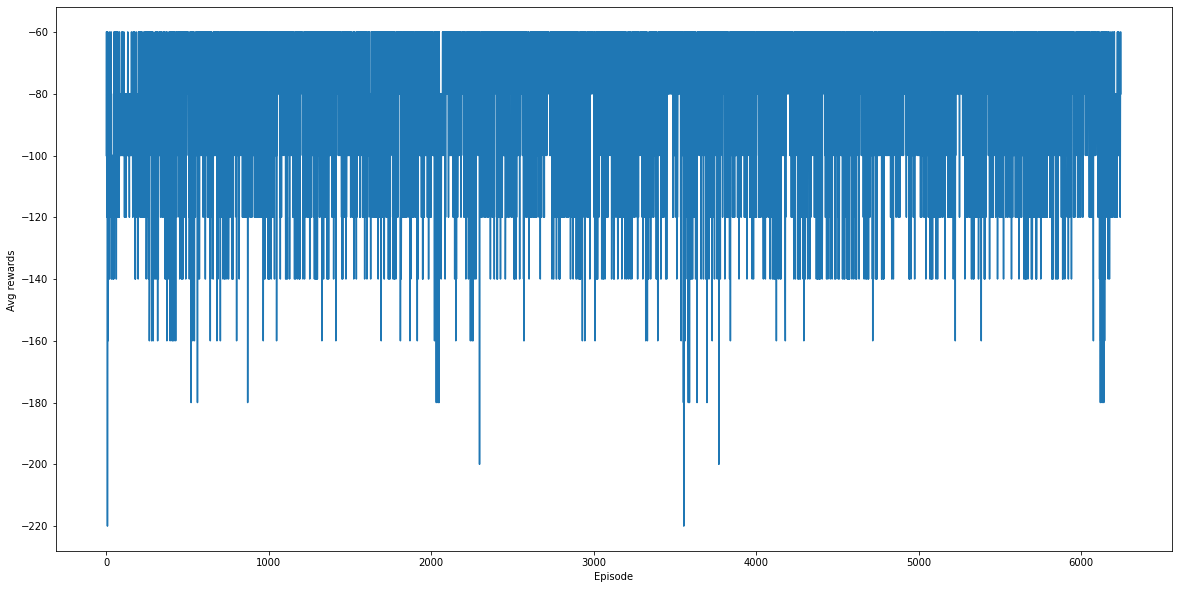

In [55]:
plt.figure(figsize=[20,10])
plt.plot(rewards_history)
plt.xlabel('Episode')
plt.ylabel('Avg rewards ')
plt.show()